In [1]:
import gym
from gym import error, spaces, utils
from swoc1 import SwocEnv
import numpy as np
from draw import DrawObservation
%matplotlib notebook
import matplotlib.pyplot as plt

GameServicePath = '../../build/GameService/GameService'

In [2]:
fieldWidth = 5
fieldHeight = 5

In [3]:
env = SwocEnv(1, GameServicePath, hostname='localhost', portOffset=0, oneTarget=True)

In [4]:
fieldObs, botObs, targetObs = env.reset(fieldWidth, fieldHeight)
fieldObs.shape

(5, 5, 4)

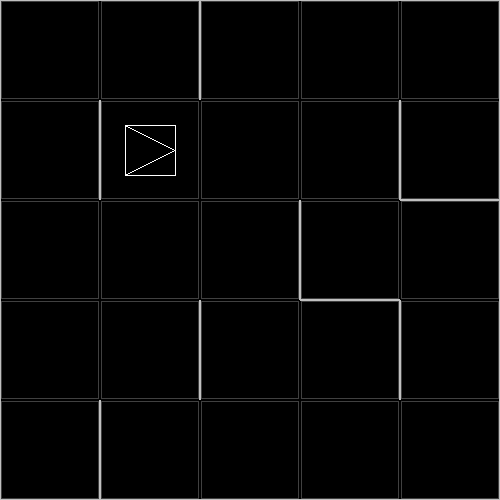

In [5]:
DrawObservation((fieldObs, botObs), 500, 500)

<IPython.core.display.Javascript object>


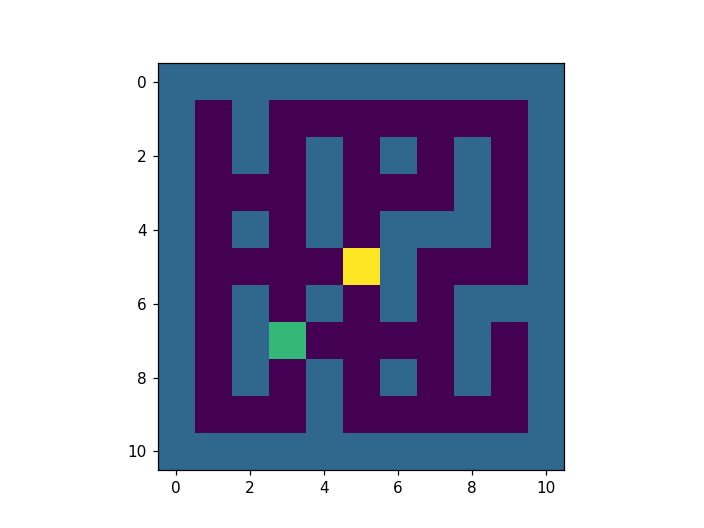

(11, 11, 4)

In [6]:
# 0 = empty, 1 = wall, 2 = bot, 3 = target
field = np.ones((fieldHeight*2+1, fieldWidth*2+1))

# empty cells
for y in range(fieldObs.shape[0]):
    cy = y*2+1
    for x in range(fieldObs.shape[1]):
        cx = x*2+1
        t,r,b,l = fieldObs[y, x]
        field[cy, cx] = 0
        field[cy+1, cx] = 1 if t else 0
        field[cy, cx+1] = 1 if r else 0
        field[cy-1, cx] = 1 if b else 0
        field[cy, cx-1] = 1 if l else 0

# bot
bx = int(botObs[0]*fieldWidth*2)
by = int(botObs[1]*fieldHeight*2)
field[by, bx] = 2

# target
tx = int(targetObs[0]*fieldWidth*2)
ty = int(targetObs[1]*fieldHeight*2)
field[ty, tx] = 3

from tensorflow.keras.utils import to_categorical
field = to_categorical(field, num_classes=4)

plt.figure()
plt.imshow(np.argmax(field, axis=-1))

field.shape

<IPython.core.display.Javascript object>


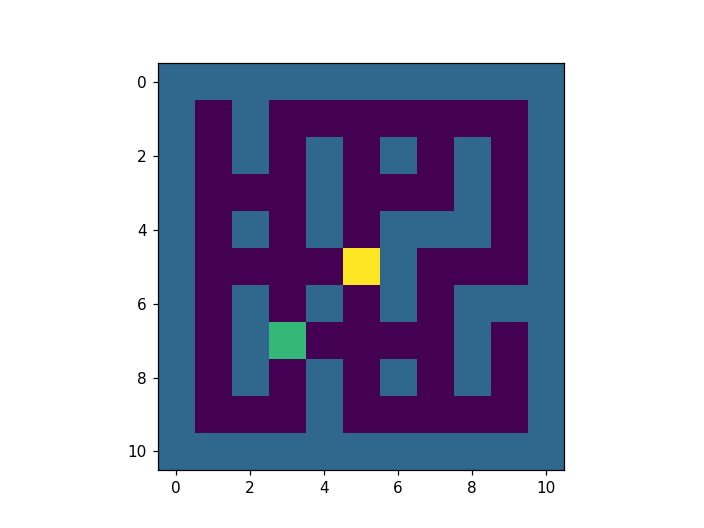

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

img = np.argmax(field, axis=-1) / 3
img = plt.get_cmap('viridis')(img)
img = Image.fromarray(np.uint8(img*255), mode='RGBA')

plt.figure()
plt.imshow(img)
